# Exploratory data analysis

Data source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Important attributes description:
* SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* Heating: Type of heating
* CentralAir: Central air conditioning
* GrLivArea: Above grade (ground) living area square feet
* BedroomAbvGr: Number of bedrooms above basement level

## Import used packages

In [2]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

## Load the data into the Pandas DataFrame - in our case it is a csv file

In [3]:
df = pd.read_csv('https://homel.vsb.cz/~pro0199/mad3_cv1_data.csv', sep=',')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Price is the most interisting attribute in our dataset, let's take a look on its distribution

#### Vizualize house prices in form of histogram
- What does it tell us about the prices?

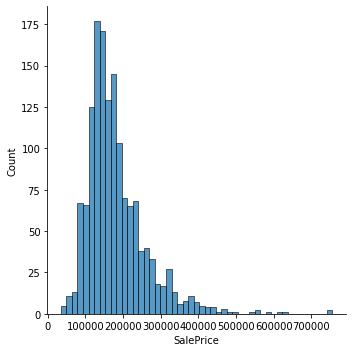

In [4]:
sns.displot(df.SalePrice)

#### Add probability density curve (Kernel density estimation)

We can use parameter *kde* if we want to show estimation of probability density function.

Modify colors of plot, use parameters:
- *color* 
- *edgecolor*

## Let's add more complexity to histogram vizualizations. Does price change for different values of GaragaFinish attribute?

#### GarageFinish: Interior finish of the garage
- Fin	Finished
- RFn	Rough Finished	
- Unf	Unfinished
- NA	No Garage

### We can see that houses with no garage are somehow missing
- The no garage houses have a *nan* value in the feature so they are not plotted

### Another very useful tecnique for the numerical features distributions are boxplots
- Did you see any of these before?
- How should we read them?
    - Quartiles
    - Median
    - Box size
    - Outliers and IQR
    - Min/max - with or without outliers

### Plot only the *SalePrice* using boxplot

## Let's take a look at the *SalePrice* for different *BldgType* values 
- What can we say about the prices?

## We have an information about a month and a year for the sold houses.
### Can you vizualize what was the average price of the house by quarters?

* We need to create a new columns with merged Year and Quarter information in this pattern: '2010-Q1','2010-Q2', etc.
* We can map the values using the *apply* function or use string concatenation directly
* If you need to change data type of the columns, you can use *astypy*

In [5]:
df['QuarterSold'] = df.MoSold // 4  + 1
df['YearQuarterSold'] = df.YrSold.astype(str) + '-' + df.QuarterSold.astype(str)
df['YearQuarterSold'].head()

0    2008-1
1    2007-2
2    2008-3
3    2006-1
4    2008-4
Name: YearQuarterSold, dtype: object

In [6]:
df['YearQuarterSoldApply'] = df.loc[:, ['MoSold', 'YrSold']].apply(lambda x: f'{x[1]}-{(x[0]//4 + 1)}', axis=1)
df['YearQuarterSoldApply'].head()

0    2008-1
1    2007-2
2    2008-3
3    2006-1
4    2008-4
Name: YearQuarterSoldApply, dtype: object

### Compute the average price for the *YearQuarterSold* attribute

## Vizualize the data using *lineplot*
- In case of xlabels mixing try to tune the *rotation* and *horizontalalignment* parameters

### Add the max, min and median to the plot
- Use *describe* and the [Pandas Melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) function
    - use YearQuarterSold as an *id_vars*
    - use 'min', 'mean', '50%', 'max' as *value_vars*

In [7]:
df.groupby('YearQuarterSold').SalePrice.describe().reset_index()

,YearQuarterSold,count,mean,std,min,25%,50%,75%,max
0,2006-1,44.0,190553.522727,71075.435079,52500.0,142875.0,172700.0,228250.0,423000.0
1,2006-2,180.0,173835.900000,78147.648285,79000.0,129675.0,157500.0,197725.0,625000.0
2,2006-3,78.0,197681.705128,86560.713023,35311.0,133625.0,178000.0,244933.5,465000.0
3,2006-4,12.0,185545.000000,69292.448559,98600.0,132000.0,175000.0,236000.0,290000.0
4,2007-1,44.0,178489.159091,119137.563987,39300.0,122000.0,145450.0,200125.0,755000.0
5,2007-2,176.0,180689.732955,82447.813812,79000.0,129000.0,156000.0,205787.5,745000.0
6,2007-3,91.0,194509.890110,72455.235610,64500.0,137500.0,181000.0,238500.0,392000.0
7,2007-4,18.0,214414.500000,81118.090800,84500.0,144750.0,231000.0,268975.0,340000.0
8,2008-1,41.0,173837.951220,73278.323817,55000.0,127000.0,159895.0,192000.0,412500.0
9,2008-2,164.0,173830.396341,63180.075472,40000.0,135000.0,165200.0,200450.0,385000.0


In [8]:
df_agg = df.groupby('YearQuarterSold').SalePrice.describe().reset_index()
df_melt = pd.melt(df_agg, id_vars=['YearQuarterSold'], value_vars=['min', 'mean', '50%', 'max'])
df_melt

,YearQuarterSold,variable,value
0,2006-1,min,52500.0
1,2006-2,min,79000.0
2,2006-3,min,35311.0
3,2006-4,min,98600.0
4,2007-1,min,39300.0
...,...,...,...
67,2009-2,max,555000.0
68,2009-3,max,402861.0
69,2009-4,max,263435.0
70,2010-1,max,611657.0


## What can we say about the minimum and maximum values?
- hint - std. deviation? outliers?

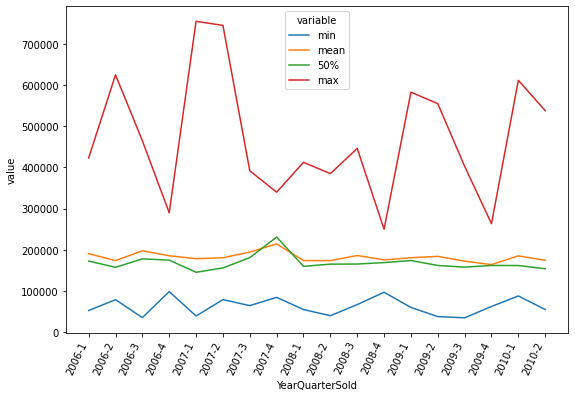

In [9]:
fig = plt.figure(figsize=(9,6))
sns.lineplot(data=df_melt, x='YearQuarterSold', y='value', hue='variable')
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

# We can take a look at number of sold houses for the defined time periods as well
- We will use standard bar plot
- In which quarter were the most houses sold?
- Fun facts: [https://themortgagereports.com/44135/whats-the-best-time-of-year-to-sell-a-home](https://themortgagereports.com/44135/whats-the-best-time-of-year-to-sell-a-home)

In [10]:
df_agg = df.groupby('YearQuarterSold').Id.count().reset_index(name='count')
df_agg

,YearQuarterSold,count
0,2006-1,44
1,2006-2,180
2,2006-3,78
3,2006-4,12
4,2007-1,44
5,2007-2,176
6,2007-3,91
7,2007-4,18
8,2008-1,41
9,2008-2,164


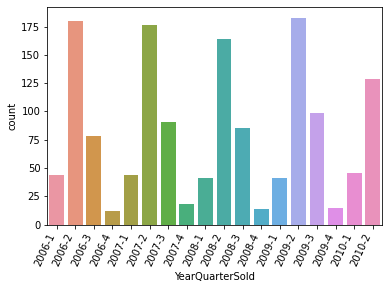

In [11]:
sns.barplot(data=df_agg, y='count', x='YearQuarterSold')
plt.xticks(rotation=65, horizontalalignment='right');

# Pairplot
- Plot pairwise relationships in a dataset
- Scatterplots for multiple pairs of numerical attributes, see [this](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
- Select only numerical attributes from dataframe - *select_dtypes*

In [12]:
df.select_dtypes(include=np.number)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,QuarterSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,61,0,0,0,0,0,2,2008,208500,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,5,2007,181500,2
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,42,0,0,0,0,0,9,2008,223500,3
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,35,272,0,0,0,0,2,2006,140000,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,84,0,0,0,0,0,12,2008,250000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,40,0,0,0,0,0,8,2007,175000,3
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,0,0,0,2,2010,210000,1
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,60,0,0,0,0,2500,5,2010,266500,2
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,112,0,0,0,0,4,2010,142125,2


#### If the dataset has too many columns, it is good to set pandas parameter *display.max_columns* to None so there is no such limit

In [13]:
with pd.option_context('display.max_columns', None):
    display(df.select_dtypes(include=np.number))

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,QuarterSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,2
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,3
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000,3
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000,1
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500,2
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125,2


#### Select only an interesting features for paiplot visualization
- The pairplot might be too big to see anything in the visualization

In [14]:
selected_columns = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']

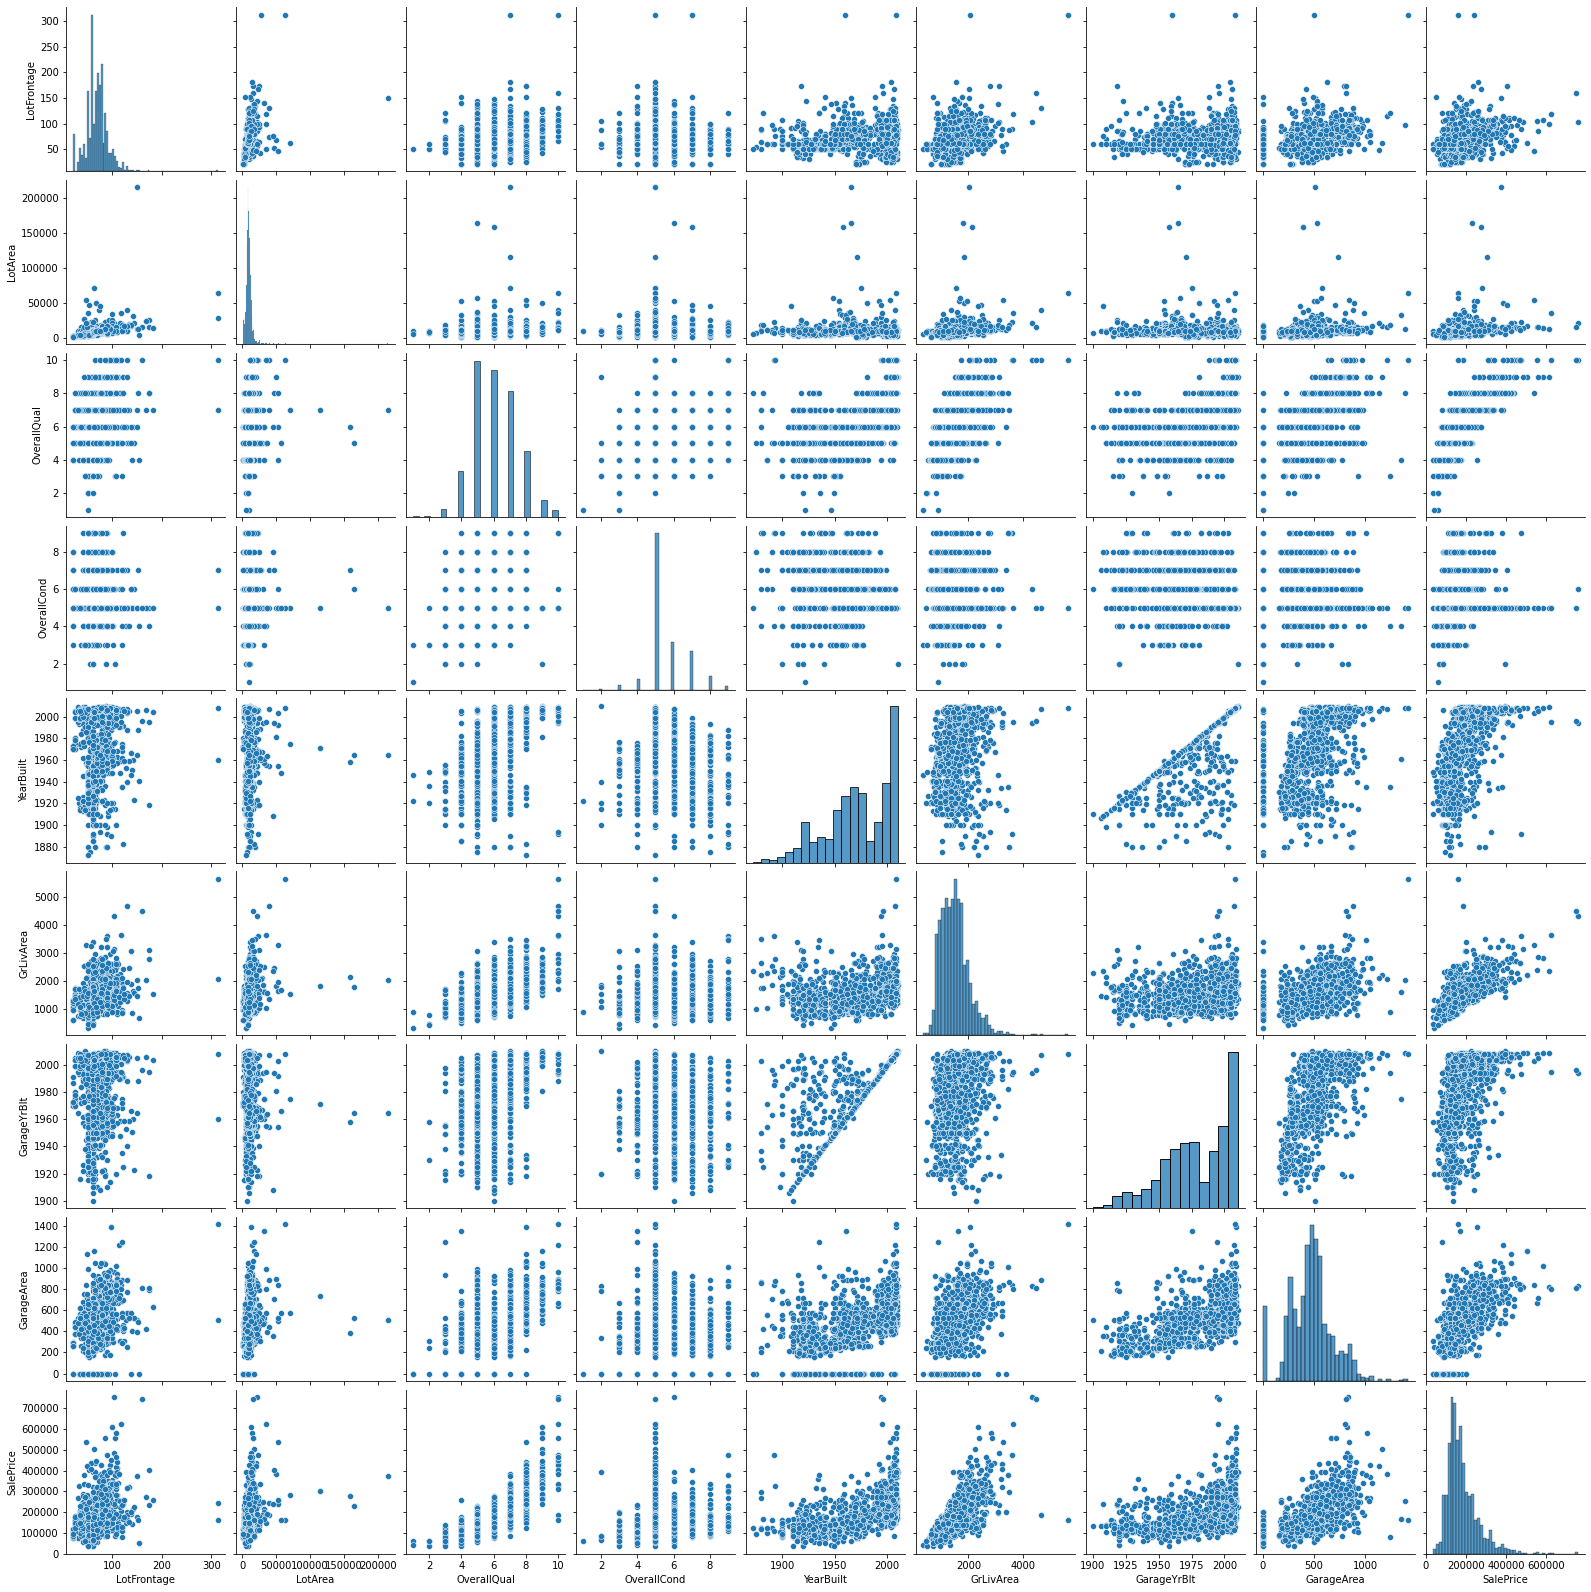

In [15]:
sns.pairplot(df[selected_columns])

S grafy ktere vypadaji jako rady by se melo pracovat jako s kategorialnimi

#### Notice that both OverallQual and OverallCond columns are rather categorical features even though they are represented by numerical values thus one would expect that the features are numerical but they aren't so scatter plot may not be the best way to visualize this type of data

- Let's select only appropropriate features this time

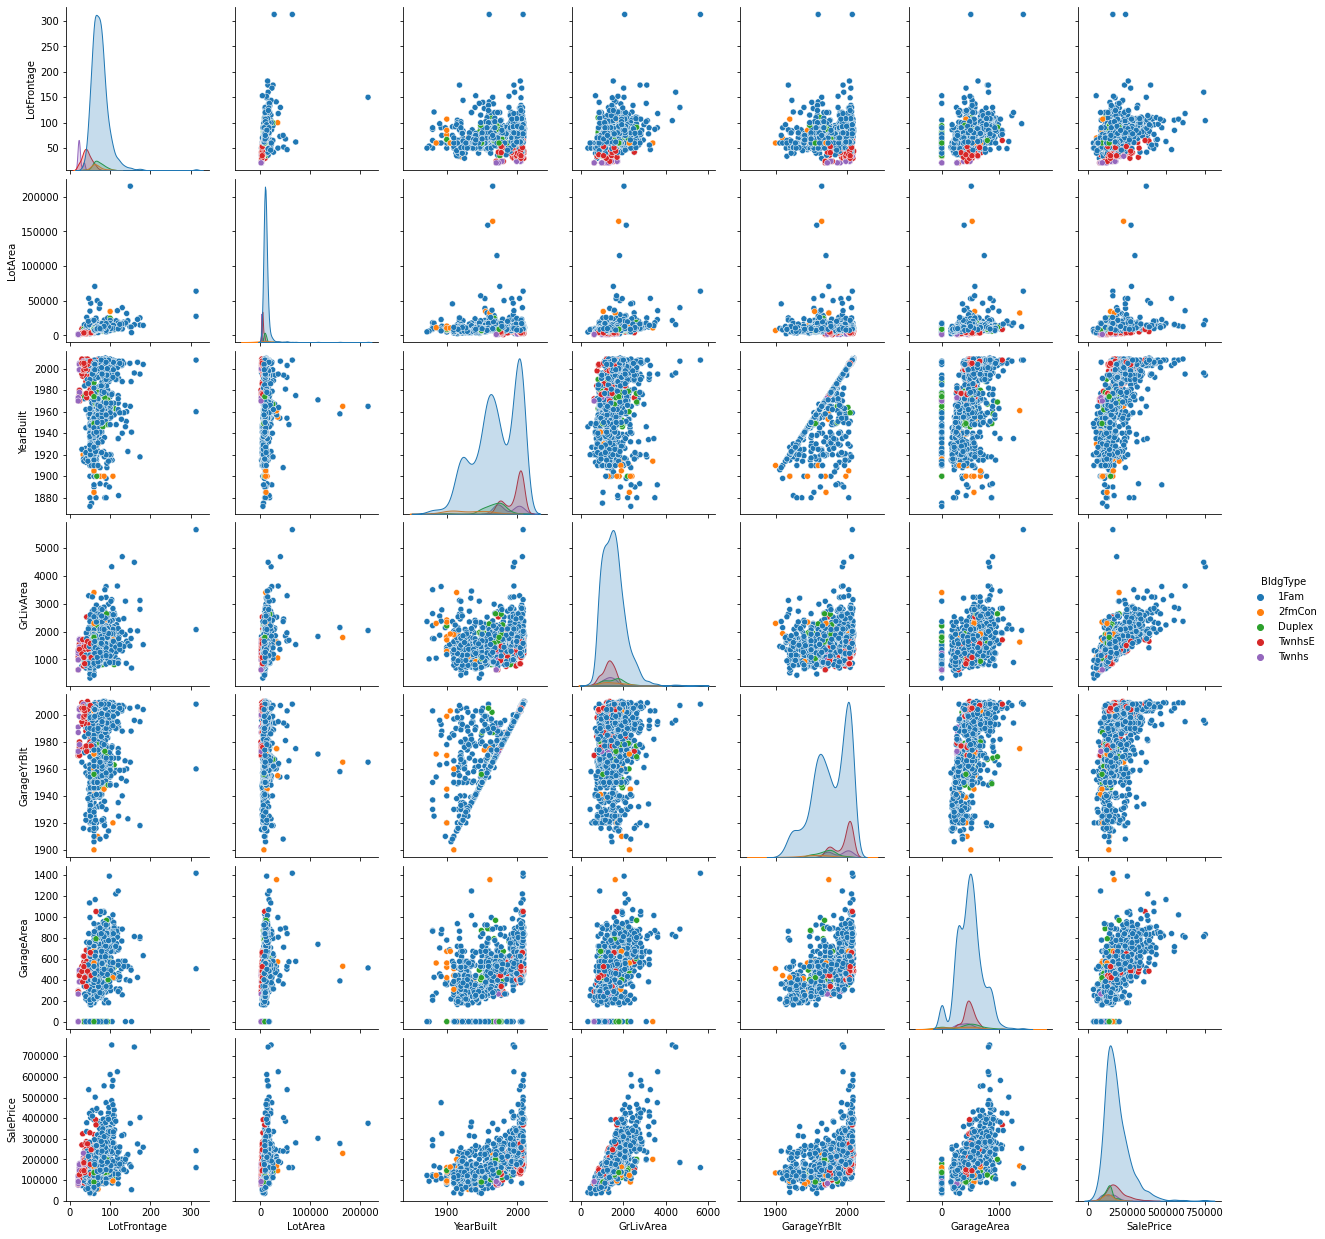

In [24]:
selected_columns = ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']
sns.pairplot(data=df, vars=selected_columns, hue='BldgType')

# Are you able to say which categorical attributes effect the price right now?
- Yeah... me neither so let's find out by plotting the data

## Start with selection of only the categorical features

In [28]:
s = ['OverallQual', 'OverallCond']

df[s[0]] = df.OverallQual.astype(str)
df[s[1]] = df.OverallCond.astype(str)

In [29]:
qualitative_columns = df.select_dtypes(exclude=np.number).columns
for c in qualitative_columns:
    if df[c].isnull().any():        
        df[c] = df[c].fillna('MISSING')
    
qualitative_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'YearQuarterSold',
       'YearQuarterSoldApply'],
      dtype='object')

In [30]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,QuarterSold,YearQuarterSold,YearQuarterSoldApply
0,1,60,RL,65.0,8450,Pave,MISSING,Reg,Lvl,AllPub,...,MISSING,0,2,2008,WD,Normal,208500,1,2008-1,2008-1
1,2,20,RL,80.0,9600,Pave,MISSING,Reg,Lvl,AllPub,...,MISSING,0,5,2007,WD,Normal,181500,2,2007-2,2007-2
2,3,60,RL,68.0,11250,Pave,MISSING,IR1,Lvl,AllPub,...,MISSING,0,9,2008,WD,Normal,223500,3,2008-3,2008-3
3,4,70,RL,60.0,9550,Pave,MISSING,IR1,Lvl,AllPub,...,MISSING,0,2,2006,WD,Abnorml,140000,1,2006-1,2006-1
4,5,60,RL,84.0,14260,Pave,MISSING,IR1,Lvl,AllPub,...,MISSING,0,12,2008,WD,Normal,250000,4,2008-4,2008-4


### Now we need to [melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) the dataset into the standard data format

In [31]:
df_melted = pd.melt(df, id_vars=['SalePrice'], value_vars=qualitative_columns)
df_melted.head()

,SalePrice,variable,value
0,208500,MSZoning,RL
1,181500,MSZoning,RL
2,223500,MSZoning,RL
3,140000,MSZoning,RL
4,250000,MSZoning,RL


### And finally we can use the [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to crate a grid of subplots and map boxplot to every cell

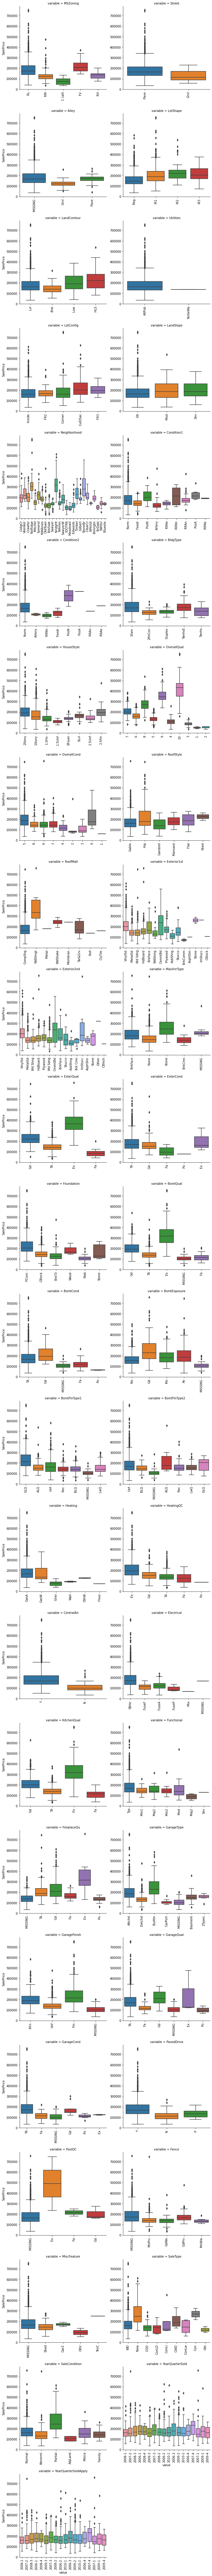

In [34]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

g = sns.FacetGrid(df_melted, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice")

## Another very useful feature is the [subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) function for defining our own grids
### We will plot boxplots together with the individual value counts using barplot for every categorical feature

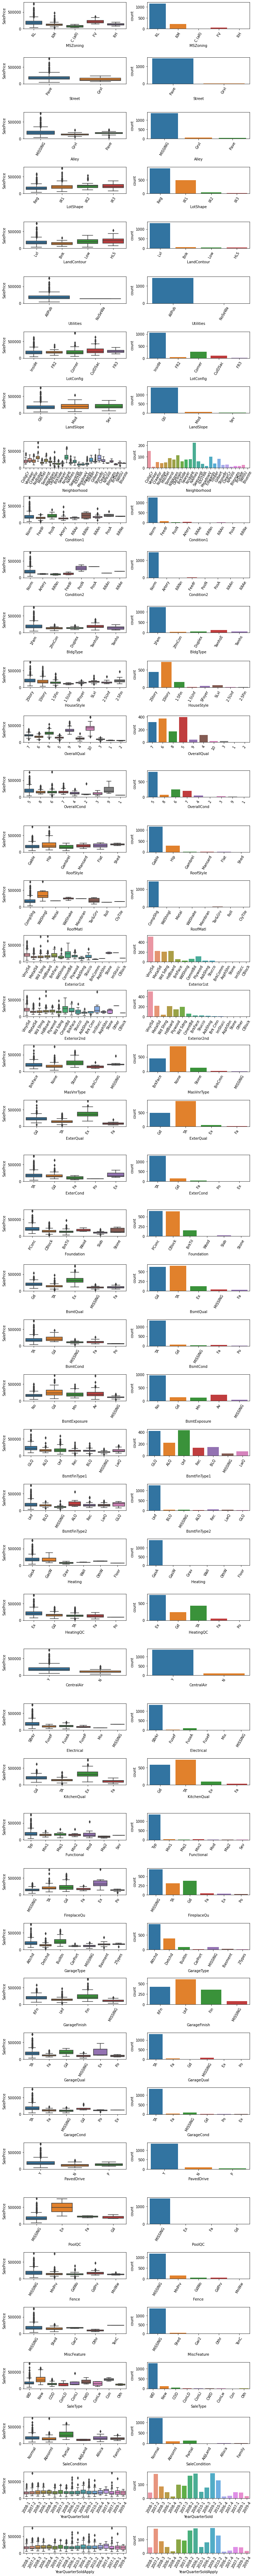

In [33]:
fig, axes = plt.subplots(len(qualitative_columns), 2, figsize=(10, 100))

for i, col in enumerate(qualitative_columns):
    ax_left = fig.axes[2*i]
    ax_right = fig.axes[2*i + 1]
    sns.boxplot(data=df, x=col, y='SalePrice', ax=ax_left)
    ax_left.set_xticklabels(ax_left.xaxis.get_majorticklabels(), rotation=60)
    sns.countplot(data=df, x=col, ax=ax_right)
    ax_right.set_xticklabels(ax_right.xaxis.get_majorticklabels(), rotation=60)
        
fig.tight_layout()

# Categorical heatmap
### Let's vizualize a relationship between *HouseStyle* and *Neighborhood* using heatmap with counts of every combination of the two attributes

In [39]:
df_agg = df.groupby(['HouseStyle', 'Neighborhood']).Id.count().reset_index(name='count')
df_agg

,HouseStyle,Neighborhood,count
0,1.5Fin,BrkSide,25
1,1.5Fin,ClearCr,6
2,1.5Fin,Crawfor,9
3,1.5Fin,Edwards,22
4,1.5Fin,Gilbert,1
...,...,...,...
91,SLvl,NWAmes,7
92,SLvl,Sawyer,5
93,SLvl,SawyerW,1
94,SLvl,Timber,4


<AxesSubplot:xlabel='Neighborhood', ylabel='HouseStyle'>

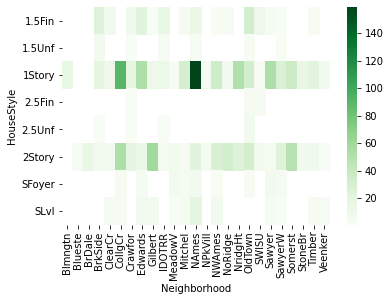

In [48]:
df_agg_matrix = df_agg.pivot(index='HouseStyle', columns='Neighborhood', values='count')
sns.heatmap(data=df_agg_matrix, cmap='Greens')

### Let's vizualize a relationship between *HouseStyle* and *BsmtFinType1* using heatmap with counts of every combination of the two attributes

In [221]:
df_agg = df.groupby(['HouseStyle', 'BsmtFinType1']).Id.count().reset_index(name='count')
df_agg

,HouseStyle,BsmtFinType1,count
0,1.5Fin,ALQ,13
1,1.5Fin,BLQ,18
2,1.5Fin,GLQ,9
3,1.5Fin,LwQ,17
4,1.5Fin,MISSING,5
5,1.5Fin,Rec,25
6,1.5Fin,Unf,67
7,1.5Unf,ALQ,2
8,1.5Unf,BLQ,1
9,1.5Unf,GLQ,1


BsmtFinType1,ALQ,BLQ,GLQ,LwQ,MISSING,Rec,Unf
HouseStyle,,,,,,,
1.5Fin,13.0,18.0,9.0,17.0,5.0,25.0,67.0
1.5Unf,2.0,1.0,1.0,1.0,0.0,0.0,9.0
1Story,128.0,93.0,212.0,33.0,27.0,78.0,155.0
2.5Fin,0.0,0.0,1.0,2.0,0.0,0.0,5.0
2.5Unf,0.0,0.0,0.0,0.0,0.0,4.0,7.0
2Story,48.0,30.0,148.0,17.0,4.0,23.0,175.0
SFoyer,8.0,3.0,23.0,2.0,1.0,0.0,0.0
SLvl,21.0,3.0,24.0,2.0,0.0,3.0,12.0


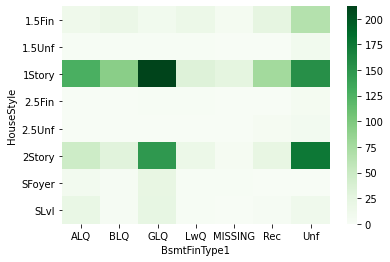

In [53]:
df_agg_matrix = df_agg.pivot(index='HouseStyle', columns='BsmtFinType1', values='count')
df_agg_matrix = df_agg_matrix.replace(np.nan, 0)
sns.heatmap(data=df_agg_matrix, cmap='Greens')

df_agg_matrix

**HouseStyle: Style of dwelling**

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

**BsmtFinType1: Rating of basement finished area**

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

# Correlation
- Take a look at [this link](https://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/)
- See also [this](https://www.simplypsychology.org/correlation.html) or [this](https://www.investopedia.com/ask/answers/032515/what-does-it-mean-if-correlation-coefficient-positive-negative-or-zero.asp) for some more info about the topic

In [54]:
corr_mat = df.corr()
corr_mat

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,QuarterSold
Id,1.000000,0.011156,-0.010601,-0.033226,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,...,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917,0.012901
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,...,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,0.000364
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,...,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799,-0.017719
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,...,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,-0.003605
YearBuilt,-0.012713,0.027850,0.123349,0.014228,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,...,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897,0.013916
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,...,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,0.021669
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,...,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493,-0.022697
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,...,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420,-0.014575
BsmtFinSF2,-0.005968,-0.065649,0.049900,0.111170,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,...,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378,-0.014566
BsmtUnfSF,-0.007940,-0.140759,0.132644,-0.002618,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,...,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479,0.028360


<AxesSubplot:>

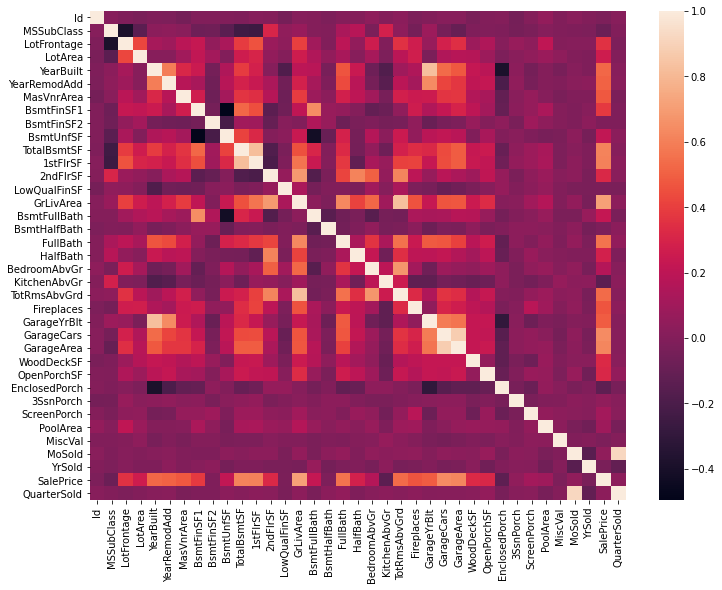

In [55]:
plt.figure(figsize=(12, 9))
sns.heatmap(corr_mat)

## Which color will be more appropropriate for corellation representation?
- Change color map *cmap* (e.g. RdYlGn)
- Set limits to adjust color map values from -1 to 1 (attributes *vmin*, *vmax*)

<AxesSubplot:>

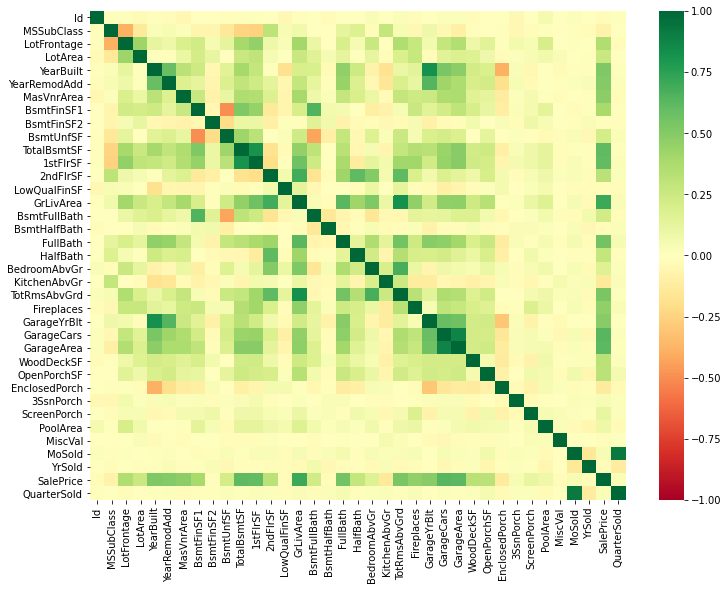

In [56]:
plt.figure(figsize=(12, 9))
sns.heatmap(corr_mat, cmap='RdYlGn', vmin=-1, vmax=1)

## What can we say about the values in this correlation sub-matrix?
- Let's focus only some subset of the features

In [57]:
selected_columns = ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']
corr_mat = df[selected_columns].corr()
corr_mat

,LotFrontage,LotArea,YearBuilt,GrLivArea,GarageYrBlt,GarageArea,SalePrice
LotFrontage,1.000000,0.426095,0.123349,0.402797,0.070250,0.344997,0.351799
LotArea,0.426095,1.000000,0.014228,0.263116,-0.024947,0.180403,0.263843
YearBuilt,0.123349,0.014228,1.000000,0.199010,0.825667,0.478954,0.522897
GrLivArea,0.402797,0.263116,0.199010,1.000000,0.231197,0.468997,0.708624
GarageYrBlt,0.070250,-0.024947,0.825667,0.231197,1.000000,0.564567,0.486362
GarageArea,0.344997,0.180403,0.478954,0.468997,0.564567,1.000000,0.623431
SalePrice,0.351799,0.263843,0.522897,0.708624,0.486362,0.623431,1.000000


<AxesSubplot:>

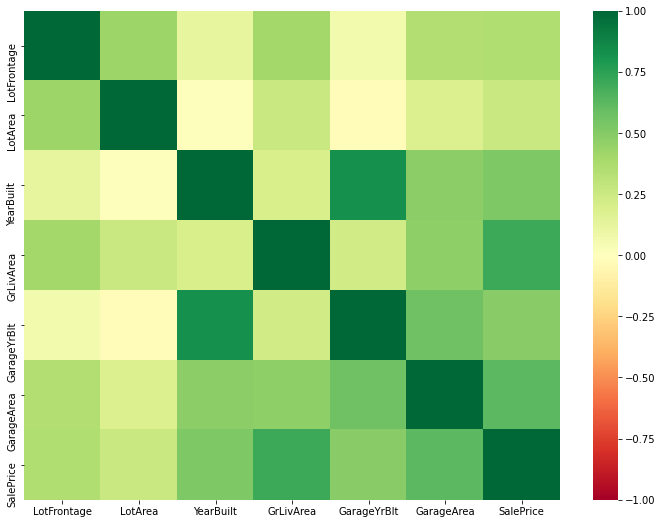

In [58]:
plt.figure(figsize=(12, 9))
sns.heatmap(corr_mat, cmap='RdYlGn', vmin=-1, vmax=1)

## Add values to the heatmap and amplify heatmap's readability

<AxesSubplot:>

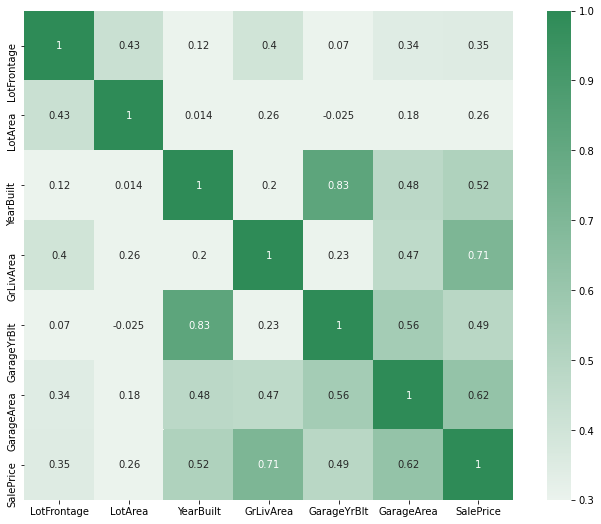

In [61]:
plt.figure(figsize=(12, 9))
sns.heatmap(corr_mat, square=True, cmap=sns.light_palette("seagreen", as_cmap=True), vmin=0.3, annot=True)

# We highly recommend taking a look at the plot gallery for some inspiration!
- https://seaborn.pydata.org/api.html

# Let's try for example scatter plot with regression line fron the example gallery
- What insight does it give us about the trend?

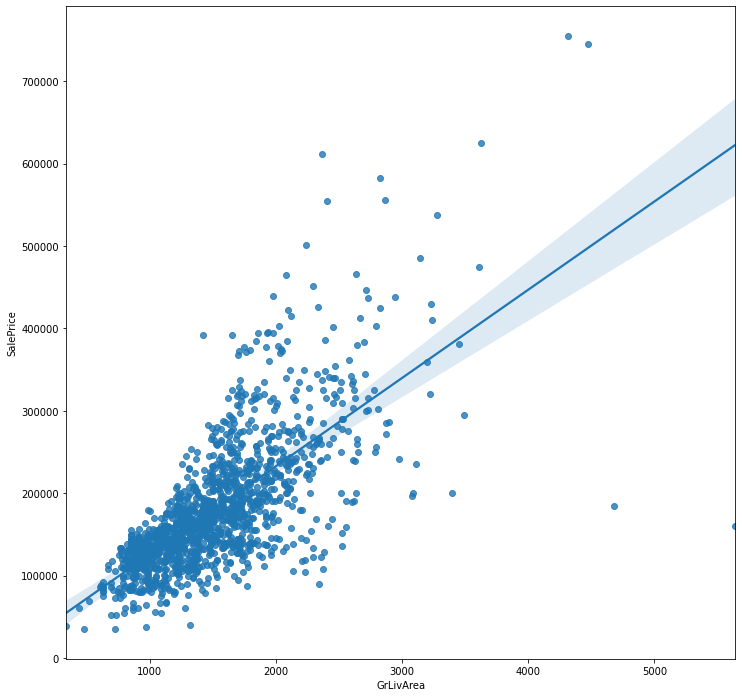

In [62]:
fig = plt.figure(figsize=(12, 12))
sns.regplot(data = df, x='GrLivArea', y='SalePrice')
plt.show()

# Tasks (2p)

## Task 1 - Outlier detection (1p)
- We need to somehow mark the outliers in the data according to the *SalePrice* and *GrLivArea*
    - One possibility is to compute [IQR](https://www.statisticshowto.com/probability-and-statistics/interquartile-range/) for both columns and mark outliers using lower and upper bounds
    - Lower bound: Q1 - 1.5*IQR
    - Upper bound: Q3 + 1.5*IQR
- If the house has *SalePrice* **OR** *GrLivArea* value outside of the bounds - it is an outlier
- Vizualize the data using scatter plot and distinguish the outlier and non-outlier data using different colors (*hue*)


## Task 2 - Correlation realionships(1p)
1. Create two filtered dataframes:
- The first one will contain only the data for BldgType = '1Fam'
- The other one will contain only the data for BldgType = 'Twnhs' or 'TwnhsE'

2. Plot correlation matrices for both of the datasets for the features:
- ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']

3. Do you see any differences or similarities in the correlation matrices? Which features you take as correlated and which are not according to you?
- Write down the insight obtained to the Markdown cell.

# Solution

- V projektu se vyjadrit a spravne popsat atributy


## I

In [16]:
attributes = ['SalePrice', 'GrLivArea']
outlier = 'IsOutlier'

In [17]:
def get_bounds(df, column):
    q25 = df[column].quantile(0.25)
    q75 = df[column].quantile(0.75)
    iqr = q75 - q25
    l_b = q25 - 1.5*iqr 
    u_b = q75 + 1.5*iqr
    return (l_b, u_b)

In [18]:
def get_dic(df, columns):
    res = {}
    for c in columns:
        res[c] = get_bounds(df, c)
    return res

In [19]:
def is_outlier(df, res):
    res_df = pd.DataFrame()
    for c in df.columns:
        res_df[c] = list(map(lambda x: x < res[c][0] or x > res[c][1], df[c]))
    res_df.head()
    return res_df

In [20]:
def build(df, attributes):
    d = get_dic(df, attributes)
    df = df[attributes].copy()
    outlier_df = is_outlier(df, d)
    matrix = np.array(outlier_df)
    r = matrix.sum(axis=1)
    r = list(map(lambda x: 'Over' if x > 0 else 'Ok', r))
    df[outlier] = r
    return df

In [21]:
dataframe = build(df, attributes)

In [22]:
dataframe.head()

,SalePrice,GrLivArea,IsOutlier
0,208500,1710,Ok
1,181500,1262,Ok
2,223500,1786,Ok
3,140000,1717,Ok
4,250000,2198,Ok


<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>

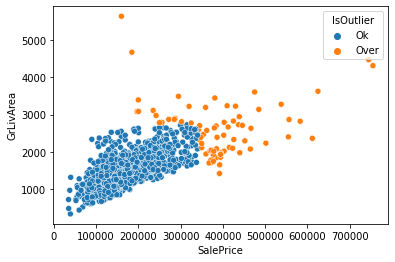

In [23]:
sns.scatterplot(data=dataframe, x = dataframe[attributes[0]], y = dataframe[attributes[1]], hue='IsOutlier')

## II

## Task 2 - Correlation realionships(1p)
1. Create two filtered dataframes:
- The first one will contain only the data for BldgType = '1Fam'
- The other one will contain only the data for BldgType = 'Twnhs' or 'TwnhsE'

2. Plot correlation matrices for both of the datasets for the features:
- ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']

3. Do you see any differences or similarities in the correlation matrices? Which features you take as correlated and which are not according to you?
- Write down the insight obtained to the Markdown cell.

In [207]:
s_c = ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']

In [208]:
df1 = df[df.BldgType == '1Fam']

In [209]:
df2 = df[(df.BldgType == 'Twnhs') | (df.BldgType == 'TwnhsE')]

In [213]:
def print_matrix(current_df, columns):
    corr_mat = current_df[columns].corr()
    sns.heatmap(corr_mat, square=True, cmap=sns.light_palette("seagreen", as_cmap=True), vmin=-1, vmax=1, annot=True)

In [214]:
selected_columns = ['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'SalePrice']

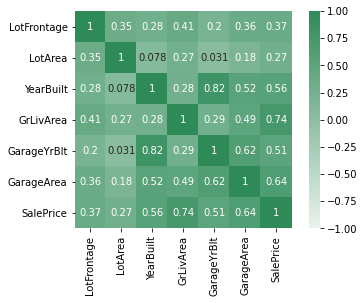

In [216]:
print_matrix(df1, s_c)

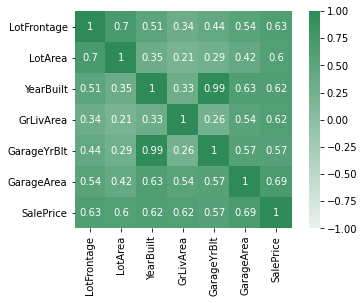

In [217]:
print_matrix(df2, s_c)

#### Insights

Podstatné je zdůraznit, že korelace není totéž jako příčinná závislost. Pokud spolu dvě veličiny korelují, neznamená to nutně, že jedna ovlivňuje druhou. Bylo například ukázáno, že počet čápů a počet narozených dětí v jednotlivých evropských státech spolu koreluje (korelace okolo 0,6). Znamená to, že čápi nosí děti?

V obou případech dochází k silné korelaci s atributem *SalePrice*

Lot area u prvního má o poznání slabší korelaci s *YearBuilt* a *GarageYrBlt*

Silná korelace mezi rokem postavení a rokem postavení garáže